In [12]:
from datetime import date
import pandas as pd
from matplotlib import pyplot as plt
import streamlit as st
import plotly.express as px


In [13]:
# Create year variable that only pulls current season's file by assuming each season starts in November of the previous year
today = date.today()
if today.month >= 11:
    year = today.year +1
else:
    year = today.year

In [14]:
# Load NCAA Basketball statistics from https://barttorvik.com/trank.php#
team_calc_stats = pd.read_csv(f'http://barttorvik.com/{year}_team_results.csv', index_col = False) # Calculated statistics
team_game_stats = pd.read_csv(f'http://barttorvik.com/{year}_fffinal.csv', index_col = False) # Raw performance statistics


/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_20524/2674047502.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  team_calc_stats = pd.read_csv(f'http://barttorvik.com/{year}_team_results.csv', index_col = False) # Calculated statistics
/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_20524/2674047502.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  team_game_stats = pd.read_csv(f'http://barttorvik.com/{year}_fffinal.csv', index_col = False) # Raw performance statistics


In [15]:
print(team_calc_stats.shape)
print(team_game_stats.shape)

(363, 44)
(363, 37)


In [16]:
# Combine team stats dataframes
teams = team_calc_stats.set_index('team').join(team_game_stats.set_index('TeamName'))
teams = teams.reset_index()
print(teams.shape)

(363, 80)


In [17]:
# Read Player data (headers retrieved from website)
players_header = ['player_name', 'team', 'conf', 'GP', 'Min_per', 'ORtg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 
'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 
'porpag', 'adjoe', 'pfr', 'year', 'pid', 'type', 'Rec Rank', ' ast/tov', ' rimmade', ' rimmade+rimmiss', ' midmade', ' midmade+midmiss', 
' rimmade/(rimmade+rimmiss)', ' midmade/(midmade+midmiss)', ' dunksmade', ' dunksmiss+dunksmade', ' dunksmade/(dunksmade+dunksmiss)', 
' pick', ' drtg', 'adrtg', ' dporpag', ' stops', ' bpm', ' obpm', ' dbpm', ' gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 
'ast', 'stl', 'blk', 'pts']

players = pd.read_csv(f'http://barttorvik.com/getadvstats.php?year={year}&csv=1', names = players_header, index_col = False)
players.head()

/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_20524/905995462.py:9: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  players = pd.read_csv(f'http://barttorvik.com/getadvstats.php?year={year}&csv=1', names = players_header, index_col = False)


,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,Jailyn Ingram,Georgia,SEC,22,19.1,92.8,19.8,45.3,46.84,2.4,...,10.4545,-0.990565,-0.367304,0.2273,1.3182,1.5455,0.6364,0.3182,0.0909,3.4545
1,Deandre Dishman,Middle Tennessee,CUSA,27,68.3,106.2,23.7,53.1,54.52,9.6,...,27.0000,1.966620,0.640612,2.2759,3.1034,5.3793,2.1379,1.1379,0.6207,10.6897
2,DeJuan Clayton,California,P12,9,24.3,84.8,21.8,38.1,40.41,1.2,...,31.5556,-1.347740,-3.163820,0.3333,1.5556,1.8889,2.8889,0.5556,0.0000,9.2222
3,Brevin Galloway,Clemson,ACC,28,68.9,109.3,19.6,54.4,59.49,0.6,...,29.7857,0.699739,1.014720,0.1429,2.1786,2.3214,2.4286,0.8571,0.2143,11.2857
4,Michael Henn,Penn St.,B10,21,15.8,129.2,16.6,67.8,68.55,6.1,...,8.8571,2.740300,0.546175,0.4286,0.7143,1.1429,0.6667,0.1429,0.1429,3.0000


In [18]:
#Filter dataframe for only certain cols
teams = teams[['rank', 'team', 'conf', 'record', 'adjoe', 'adjde', 'sos', 'consos', 'Conf Win%', 'Fun Rk, adjt', 
               'eFG%', 'eFG% Def', 'FTR', 'FTR Def', 'OR%', 'DR%',  'TO%', 'TO% Def.', '3P%', '3pD%', '2p%',  '2p%D', 'ft%', 'ft%D']]

In [19]:
# Filtering top 10 conferences by rank/number of teams
#top10_conf = ['B12', 'SEC', 'B10', 'BE', 'P12', 'ACC', 'MWC', 'Amer', 'WCC', 'A10']

#top10_conf = teams.groupby('conf')['rank'].sum().div(teams.groupby('conf')['rank'].count()).sort_values(ascending=True)[:10]
#top10_conf = list(top10_conf.index)

In [20]:
#creating header with an option to filter the data and the checkbox:
#dataset includes all teams but this will let users decide whether they want
#to see all teams or just those in the top 10 conferences

st.header("2023 NCAA Men's Basketball Statistics")
st.write("""
##### T-Rank based on offensive and defensive efficiency from https://barttorvik.com/trank.php#
""")
st.write("""
##### Filter the data below to see only team in the top 10 conferences
""")
conf_win_top25 = st.checkbox('Top 25% of Teams by Conference Win Percent')


In [21]:
#conf_win_top25

In [34]:
# Filtering top 5% of teams by conference win %
conf_win_5pct = teams['Conf Win%'].quantile(.95) # Calculate 95% threshold
teams_conf_win_5pct = teams[teams['Conf Win%'] >= conf_win_5pct]['team'] #filter df for teams >= 3rd quartile (top 25)
#teams_conf_win_Q3 = list(teams_conf_win_Q3['team']) #List of teams


if conf_win_top25:
    teams = teams[teams['Conf Win%'] >= conf_win_5pct]

In [35]:
# Select box for Conference
#conf_win_choice = teams_conf_win_q3
#make_choice_conf = st.selectbox('Select team:', conf_win_choice)

In [38]:
#filtering dataset on chosen team and ...
filtered_teams=teams[teams['team'].isin(teams_conf_win_5pct) == True]
filtered_teams


,rank,team,conf,record,adjoe,adjde,sos,consos,Conf Win%,"Fun Rk, adjt",...,OR%,DR%,TO%,TO% Def.,3P%,3pD%,2p%,2p%D,ft%,ft%D
0,1,Houston,Amer,27-2,121.719473,92.275371,0.587299,0.632801,0.937500,115,...,38.1,27.9,15.1,22.2,35.1,27.5,54.2,42.6,71.6,69.6
1,2,Alabama,SEC,25-4,118.636094,91.858961,0.709132,0.720373,0.937500,60,...,33.2,27.4,18.9,15.7,34.8,27.4,54.5,42.1,72.3,69.7
3,4,UCLA,P12,25-4,114.896815,90.340148,0.653613,0.724161,0.888889,108,...,34.1,28.3,15.3,24.3,35.4,30.7,50.9,46.9,70.1,70.5
5,6,Saint Mary's,WCC,25-6,114.437455,91.406730,0.612797,0.635652,0.875000,257,...,33.3,21.7,16.3,19.3,36.8,32.2,51.4,44.8,69.5,75.6
10,11,Gonzaga,WCC,25-5,125.069755,102.205668,0.639534,0.640409,0.875000,40,...,30.9,25.4,14.8,18.8,37.2,35.2,58.9,51.9,69.9,73.6
13,14,Marquette,BE,24-6,121.135782,100.306936,0.654102,0.733621,0.842105,42,...,26.9,31.1,15.4,22.9,35.3,35.4,59.3,51.0,71.2,69.5
31,32,Liberty,ASun,25-7,112.794646,97.470190,0.410990,0.406561,0.833333,294,...,25.4,20.2,16.3,19.5,36.7,34.9,57.4,47.0,72.7,73.0
39,40,Florida Atlantic,CUSA,26-3,113.600007,99.047939,0.473874,0.540167,0.888889,24,...,30.4,24.6,16.7,18.5,37.4,33.2,53.6,44.8,71.0,73.7
60,61,Iona,MAAC,22-7,110.432694,98.653884,0.442383,0.331247,0.833333,237,...,30.3,30.5,15.4,21.1,35.2,28.7,51.2,46.6,72.1,70.2
62,63,College of Charleston,CAA,28-3,112.617649,100.694355,0.381065,0.338098,0.888889,41,...,35.4,25.4,17.0,19.1,34.1,31.0,53.1,49.1,74.1,67.8


In [28]:
#showing the final table in streamlit
st.dataframe(filtered_teams)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
# Add rank grouping
def rank_group(rank):
    if rank <= 25:
        return 'Top 25'
    elif rank <= 100:
        return '26 - 100'
    elif rank <= 200:
        return '101 - 200'
    else:
        return '201 +'

In [17]:
# Add col to data with rank group
teams['rank_desc'] = teams['rank'].apply(rank_group)

/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_16439/3138444464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['rank_desc'] = teams['rank'].apply(rank_group)


In [22]:
st.header('Team analyis by rank')
st.write("""
###### Now let's check how price is affected by odometer, engine capacity or number of photos in the adds
""")

#Distribution of price depending on odometer_value,engine_capacity,number_of_photos
#with the split by age category

#list_for_scatter=['odometer_value','engine_capacity','number_of_photos']
#choice_for_scatter = st.selectbox('Price dependency on ', list_for_scatter)
fig1 = px.scatter(teams, x="adjoe", y='adjde',hover_data=['team'], color='rank_desc')

fig1.update_layout(
title="<b> Offense vs Defense</b>")
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<AxesSubplot:title={'center':'rank'}, xlabel='conf'>

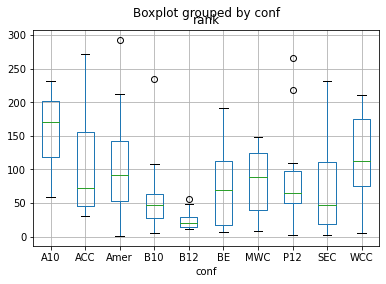

In [ ]:
#data_top10_conf.boxplot(column = 'rank', by = 'conf')

In [55]:
st.header('Player analysis')
st.write("""
###### Let's analyze what influences price the most. We will check how distibution of price varies depending on 
transmission, engine or body type and state
""")
         
#creating options for filter from all teams
team_choice = teams['team'].unique()
make_choice_team1 = st.selectbox('Select team 1:', team_choice)
make_choice_team2 = st.selectbox('Select team 2:', team_choice)

#filtering dataset on chosen team and ...
filtered_team=players[(players['team']==make_choice_team1) | (players['team']==make_choice_team2)]

# Will create histograms with the split by parameter of choice: color, transmission, engine_type, body_type, state

#creating list of options to choose from
list_for_hist=[' bpm', ' obpm', ' dbpm', ' gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

#creating selectbox
choice_for_hist = st.selectbox('Player Metrics', list_for_hist)

#plotly histogram, where price_usd is split by the choice made in the selectbox
fig3 = px.histogram(filtered_team, x=choice_for_hist, color='team')

#adding tittle
fig3.update_layout(
title="<b> Split of price by {}</b>".format(choice_for_hist))

#embedding into streamlit
st.plotly_chart(fig3)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
#cd git_projects/practicum_sprint4_project
#streamlit run app.py